<a href="https://colab.research.google.com/github/Ryoma-HCU/Prog2kakushin/blob/main/work2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#プログラム2 (Numpy)：音声フーリエ変換

## データの表現方法 (フーリエ級数展開)
様々な数値データ $f(t)$ は右辺より，様々な係数($a_{n}$, $b_{n}$)を持つ様々な周波数($\frac{n}{T}$)の三角関数(cos, sin)で表現可能である事を意味している．

$$f(t)=\frac{a_{0}}{2}+\sum_{n=1}^\infty(a_{n}\cos(\frac{2\pi nt}{T})+b_{n}\sin(\frac{2\pi nt}{T}))$$

## 積分による各周波数の振幅導出
このプログラムでは上記の積分(逆算)から導出される係数を使い，入力音声の周波数とその合成振幅を分析する．

$$a_{n}=\frac{2}{T}\int_{0}^{T}f(t)\cos(\frac{2\pi nt}{T})dt$$

$$b_{n}=\frac{2}{T}\int_{0}^{T}f(t)\sin(\frac{2\pi nt}{T})dt$$

1. 最初に分析したい音声ファイルを画面左側にある「ファイル」項目内に直下でドラック&ドロップする．

   音声ファイルが用意できない場合，下記のwebサイトから利用規約を遵守した上で好きな音声をダウンロードする．

In [ ]:
"https://taira-komori.jpn.org/freesound.html"

'https://taira-komori.jpn.org/freesound.html'

2. 次に下記のコードを実行して，音声ファイル読込ライブラリをインストールする．

In [1]:
pip install pydub

※colab上のバグで入力欄が稀に表示されない場合があるが，その際は実行ボタンを何度か押す．

読み込みたいファイル名を入力してください：pencil_roll
拡張子名を入力してください：mp3


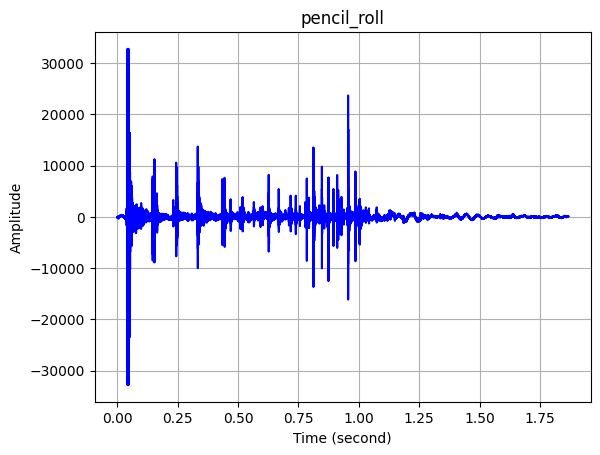

●調べたい時間(秒)範囲を入力してください(0～1.8666666666666667)
下限：0.75
上限：0.80

●調べたい周波数(Hz)帯域を入力してください(正の数)
下限：1
上限：5000

最大周波数：1326.036 Hz
最大振れ幅：110.893



<function matplotlib.pyplot.show(close=None, block=None)>

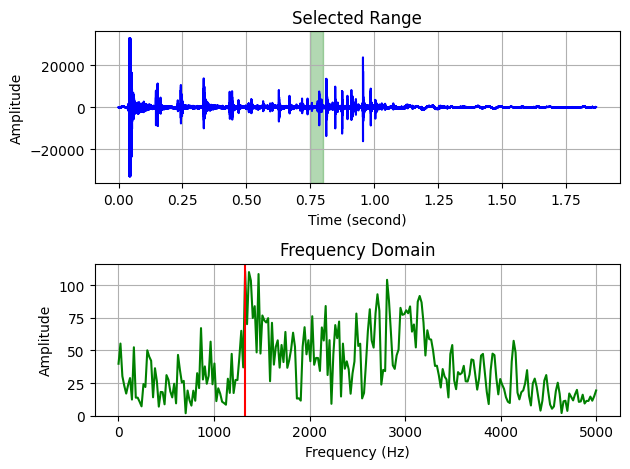

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from pydub import AudioSegment

# ファイル名入力
fname = input("読み込みたいファイル名を入力してください：")
extension = input("拡張子名を入力してください：")

# 時間領域グラフ 読込/出力
sound = AudioSegment.from_file(str(fname)+"."+str(extension), str(extension))
f = sound.get_array_of_samples()
range_t = sound.duration_seconds
t = np.linspace(0, range_t, len(f))
plt.plot(t, f, c="b")
plt.title(str(fname))
plt.xlabel("Time (second)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

# 捜索範囲入力
print("●調べたい時間(秒)範囲を入力してください(0～"+str(range_t)+")")
while True:
  s_low = float(input("下限："))
  s_up = float(input("上限："))
  if s_up > s_low and s_low >= 0 and s_up <= range_t:
    break
  elif s_up <= s_low:
    print("上限値＞下限値 となる様に入力してください．")
  elif not(0 <= s_up <= range_t) or not(0 <= s_low <= range_t):
    print("入力の範囲は 0～"+str(range_t)+"です．")
  else:
    print("正常な値を入力してください．")
print()
print("●調べたい周波数(Hz)帯域を入力してください(正の数)")
while True:
  Hz_low = float(input("下限："))
  Hz_up = float(input("上限："))
  if Hz_up > Hz_low and Hz_low > 0:
    break
  elif Hz_up <= Hz_low:
    print("上限値＞下限値 となる様に入力してください．")
  elif Hz_low <= 0:
    print("入力する値は正の数です．")
  else:
    print("正常な値を入力してください．")
print()

# 周波数領域グラフ 計算/出力
amp = np.array([])
## 単位変換
range_low = int(len(f)*s_low / range_t)
range_up = int(len(f)*s_up / range_t)
T = range_up - range_low
band_low = int(Hz_low*T*range_t / len(f))
band_up = int(Hz_up*T*range_t / len(f))
if band_low <= 0:
  band_low = 1
if band_up <= 0:
  band_up = 2
## 積分計算(台形面積計算)
for n in range(band_low, band_up+1):
  scos_n = 0
  ssin_n = 0
  for x in range(range_low, range_up):
    scos_n += (f[x]*np.cos(2*n*x*np.pi/T) + f[x+1]*np.cos(2*n*(x+1)*np.pi/T)) / 2
    ssin_n += (f[x]*np.sin(2*n*x*np.pi/T) + f[x+1]*np.sin(2*n*(x+1)*np.pi/T)) / 2
  a_n = scos_n * 2/T
  b_n = ssin_n * 2/T
  amp = np.append(amp, np.sqrt(a_n**2 + b_n**2))

Hz = np.linspace(Hz_low, Hz_up, len(amp))
print("最大周波数："+"\033[91m"+str(format(Hz[np.argmax(amp)],".3f"))+"\033[0m"+" Hz")
print("最大振れ幅："+"\033[91m"+str(format(np.max(amp),".3f"))+"\033[0m")
print()

## グラフ出力
plt.subplot(2,1,1)
plt.plot(t, f, c="b")
plt.axvspan(s_low, s_up, alpha=0.3, color="g")
plt.title("Selected Range")
plt.xlabel("Time (second)")
plt.ylabel("Amplitude")
plt.grid()

plt.subplot(2,1,2)
plt.plot(Hz, amp, color="g")
plt.axvline(Hz[np.argmax(amp)], color="r")
plt.title("Frequency Domain")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.ylim(0,)
plt.grid()

plt.tight_layout()
plt.show